In [1]:
import pandas as pd
from tensorflow import keras
from matplotlib import pyplot as plt
# from sklearn.preprocessing import StandardScaler
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import os
import statistics as sts
from scipy.stats import norm
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2025-09-24 22:44:56.166132: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758779096.179257   60831 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758779096.183394   60831 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758779096.193431   60831 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758779096.193452   60831 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758779096.193456   60831 computation_placer.cc:177] computation placer alr

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
data = pd.read_csv('databases/all_profiles2.csv')


# data.index = pd.to_datetime(data['Date Time'], format='%d.%m.%Y %H:%M:%S')
# data['Date Time'] = pd.to_datetime(data['Date Time'], format='%d.%m.%Y %H:%M:%S')
# data['Date Time'] = pd.to_datetime(data['Time'], unit='ms')
# data = data[::10]

data = data.dropna()
data

,client_id,first_name,last_name,ssn,address,annual_income,employment_status,credit_score,loan_amount_requested,collateral_value,alimony_payments_monthly,sentiment_score
0,1,Deborah,Newman,165-40-2844,"8928 Gomez Shoal\nEast Mark, NJ 32109",136817,Employed,612,13723,0,0,-0.97
1,2,Randy,Martinez,708-22-1813,"97604 Julia Rest\nWilkinsonhaven, MT 98490",167238,Self-Employed,838,32931,79449,0,0.04
2,3,Charles,Henderson,774-71-9919,52585 Kathleen Hollow Apt. 843\nSouth Raymondv...,142614,Self-Employed,715,36903,57272,1420,-0.46
3,4,Darlene,Brock,593-62-9717,"2234 Johnny Cliffs\nLake Vanessa, ME 96557",199520,Self-Employed,843,17739,45291,0,-0.42
4,5,James,Brown,888-74-4439,"0124 Cynthia Parkways\nJoyfurt, NV 33778",159743,Self-Employed,633,13732,32466,1748,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Cameron,Carter,489-14-7015,"55014 Dawson Track Suite 060\nWardfort, AK 77966",86843,Self-Employed,718,18296,0,0,0.65
99996,99997,Richard,Caldwell,058-35-7778,"8938 Melton Junctions\nSarahstad, NJ 31996",41370,Employed,580,40623,0,412,-0.47
99997,99998,Leslie,Dennis,377-81-5244,"96970 Perry Track Suite 221\nDavidview, AS 37337",86373,Self-Employed,801,37145,18917,0,-0.47
99998,99999,Robert,Jones,785-01-8596,"097 Nguyen Ranch\nPort Lawrence, NV 12972",87445,Employed,666,20479,0,0,0.05


In [3]:
numeric_data = data.select_dtypes(['int64', 'float64'])
numeric_data

,client_id,annual_income,credit_score,loan_amount_requested,collateral_value,alimony_payments_monthly,sentiment_score
0,1,136817,612,13723,0,0,-0.97
1,2,167238,838,32931,79449,0,0.04
2,3,142614,715,36903,57272,1420,-0.46
3,4,199520,843,17739,45291,0,-0.42
4,5,159743,633,13732,32466,1748,0.76
...,...,...,...,...,...,...,...
99995,99996,86843,718,18296,0,0,0.65
99996,99997,41370,580,40623,0,412,-0.47
99997,99998,86373,801,37145,18917,0,-0.47
99998,99999,87445,666,20479,0,0,0.05


Text(0.5, 1.0, 'Correlation chart')

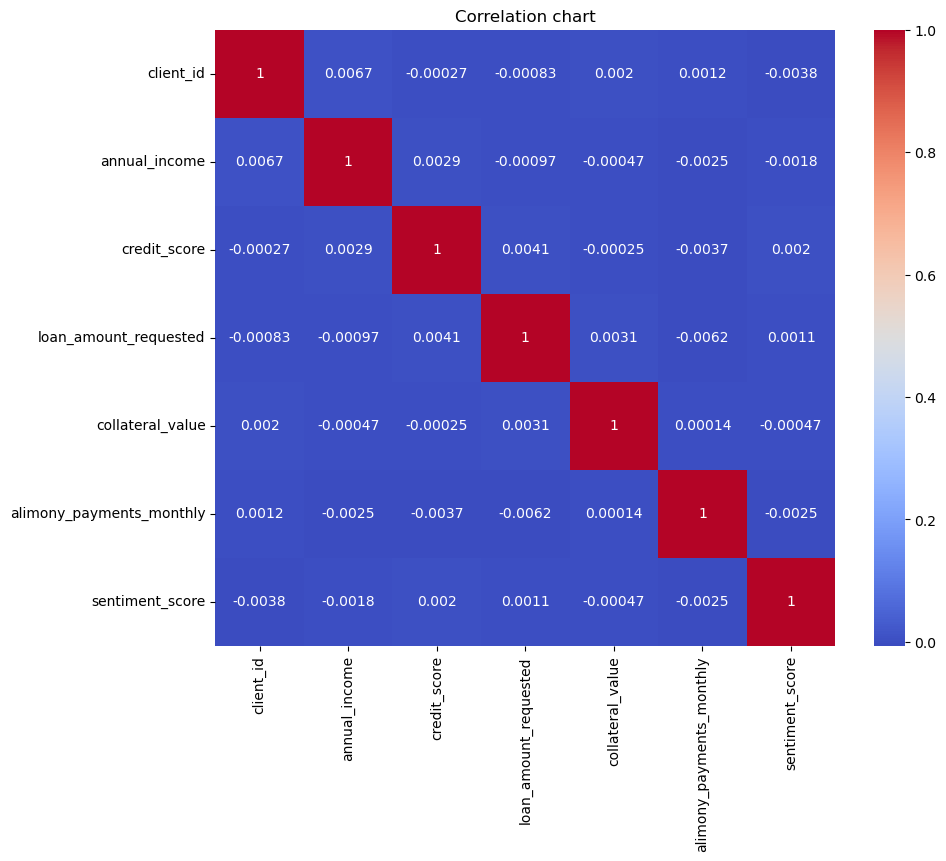

In [4]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation chart')

In [5]:
colors = ['blue', 'orange', 'red', 'green', 'teal', 'yellow', 'black', 'purple', 'pink', 'olive']
to_train = ['annual_income', 'credit_score', 'loan_amount_requested', 'collateral_value', 'alimony_payments_monthly']
to_predict = ['sentiment_score']
load_model = False

In [6]:
print(list(data.columns))

['client_id', 'first_name', 'last_name', 'ssn', 'address', 'annual_income', 'employment_status', 'credit_score', 'loan_amount_requested', 'collateral_value', 'alimony_payments_monthly', 'sentiment_score']


In [7]:
temp_data = data[list(set(to_train+to_predict))]
temp_data

,credit_score,loan_amount_requested,alimony_payments_monthly,annual_income,collateral_value,sentiment_score
0,612,13723,0,136817,0,-0.97
1,838,32931,0,167238,79449,0.04
2,715,36903,1420,142614,57272,-0.46
3,843,17739,0,199520,45291,-0.42
4,633,13732,1748,159743,32466,0.76
...,...,...,...,...,...,...
99995,718,18296,0,86843,0,0.65
99996,580,40623,412,41370,0,-0.47
99997,801,37145,0,86373,18917,-0.47
99998,666,20479,0,87445,0,0.05


In [8]:
temp_vals = temp_data.filter([*to_train])
dataset = temp_vals.values

training_data_length = int(np.ceil(len(dataset)*0.9))
dataset

array([[136817,    612,  13723,      0,      0],
       [167238,    838,  32931,  79449,      0],
       [142614,    715,  36903,  57272,   1420],
       ...,
       [ 86373,    801,  37145,  18917,      0],
       [ 87445,    666,  20479,      0,      0],
       [153993,    619,  21752,      0,      0]], shape=(100000, 5))

In [9]:
training_data_length

90000

In [10]:
scaler = sklearn.preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[ 4.41115584e-01, -1.31387444e+00, -1.05983489e+00,
        -7.72060922e-01, -4.21536956e-01],
       [ 1.06087168e+00,  1.56806228e+00,  4.19738866e-01,
         1.69611424e+00, -4.21536956e-01],
       [ 5.59215780e-01, -4.25404464e-04,  7.25698203e-01,
         1.00716006e+00,  2.56865242e+00],
       ...,
       [-5.86561885e-01,  1.09624078e+00,  7.44339230e-01,
        -1.84382417e-01, -4.21536956e-01],
       [-5.64722415e-01, -6.25270091e-01, -5.39426708e-01,
        -7.72060922e-01, -4.21536956e-01],
       [ 7.91036054e-01, -1.22461091e+00, -4.41368743e-01,
        -7.72060922e-01, -4.21536956e-01]], shape=(100000, 5))

In [11]:
training_data = scaled_data[:training_data_length]
training_data

array([[ 4.41115584e-01, -1.31387444e+00, -1.05983489e+00,
        -7.72060922e-01, -4.21536956e-01],
       [ 1.06087168e+00,  1.56806228e+00,  4.19738866e-01,
         1.69611424e+00, -4.21536956e-01],
       [ 5.59215780e-01, -4.25404464e-04,  7.25698203e-01,
         1.00716006e+00,  2.56865242e+00],
       ...,
       [-2.58908711e-01, -1.23736284e+00, -1.22991500e+00,
        -7.72060922e-01,  1.57683608e+00],
       [-6.73040286e-02,  7.64690538e-01,  1.05438111e+00,
         1.08311682e+00, -4.21536956e-01],
       [-6.46681547e-01,  5.60659620e-01,  1.27599365e+00,
         2.29621921e+00, -4.21536956e-01]], shape=(90000, 5))

In [12]:
dataset_predict = temp_data.filter([*to_predict]).values
dataset_predict

array([[-0.97],
       [ 0.04],
       [-0.46],
       ...,
       [-0.47],
       [ 0.05],
       [ 0.78]], shape=(100000, 1))

In [13]:
scaled_data_predict = scaler.fit_transform(dataset_predict)
scaled_data_predict

array([[-1.68706774],
       [ 0.06457671],
       [-0.802574  ],
       ...,
       [-0.81991702],
       [ 0.08191973],
       [ 1.34795978]], shape=(100000, 1))

In [14]:
x_train = scaled_data[:training_data_length]
x_train

array([[ 4.41115584e-01, -1.31387444e+00, -1.05983489e+00,
        -7.72060922e-01, -4.21536956e-01],
       [ 1.06087168e+00,  1.56806228e+00,  4.19738866e-01,
         1.69611424e+00, -4.21536956e-01],
       [ 5.59215780e-01, -4.25404464e-04,  7.25698203e-01,
         1.00716006e+00,  2.56865242e+00],
       ...,
       [-2.58908711e-01, -1.23736284e+00, -1.22991500e+00,
        -7.72060922e-01,  1.57683608e+00],
       [-6.73040286e-02,  7.64690538e-01,  1.05438111e+00,
         1.08311682e+00, -4.21536956e-01],
       [-6.46681547e-01,  5.60659620e-01,  1.27599365e+00,
         2.29621921e+00, -4.21536956e-01]], shape=(90000, 5))

In [15]:
x_test = scaled_data[training_data_length:]
x_test

array([[ 0.89334745, -1.4158899 , -0.36241398, -0.77206092,  2.97295971],
       [ 0.82389712, -0.38298338, -1.29847084,  0.17343759, -0.42153696],
       [-0.78234296,  0.34387677, -0.97756787, -0.77206092, -0.42153696],
       ...,
       [-0.58656189,  1.09624078,  0.74433923, -0.18438242, -0.42153696],
       [-0.56472241, -0.62527009, -0.53942671, -0.77206092, -0.42153696],
       [ 0.79103605, -1.22461091, -0.44136874, -0.77206092, -0.42153696]],
      shape=(10000, 5))

In [16]:
y_train = scaled_data_predict[:training_data_length]
y_train

array([[-1.68706774],
       [ 0.06457671],
       [-0.802574  ],
       ...,
       [-1.61769568],
       [-0.36899865],
       [ 0.23800686]], shape=(90000, 1))

In [17]:
y_test = scaled_data_predict[training_data_length:]
y_test

array([[-0.85460305],
       [ 0.93172743],
       [ 1.60810499],
       ...,
       [-0.81991702],
       [ 0.08191973],
       [ 1.34795978]], shape=(10000, 1))

In [18]:
model = keras.models.Sequential()
model

<Sequential name=sequential, built=False>

In [19]:
model.add(keras.layers.Dense(512, activation='relu', input_shape=(x_test.shape[1],)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(len(to_predict)))
model.compile(optimizer='adam', loss='mae', metrics=[keras.metrics.RootMeanSquaredError()])

/usr/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758779099.966313   60831 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2816 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [20]:
model.summary()


In [21]:
model_name = 'model_' + '_'.join([i.replace(' ', '_') for i in to_train[:]]) + '_to_' + '_'.join([i.replace(' ', '_') for i in to_predict[:]]) + '.keras'
# model_name = f"model_{to_train_.replace(' ', '_')}.keras"
if not load_model:
    model.fit(x_train, y_train, epochs=200, batch_size=32)
    model.save(model_name)
else:
    model = keras.models.load_model(model_name)

Epoch 1/200


I0000 00:00:1758779109.695543   68666 service.cc:152] XLA service 0x7fe6d000dbe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758779109.695564   68666 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-09-24 22:45:09.713002: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1758779109.849128   68666 cuda_dnn.cc:529] Loaded cuDNN version 91100
2025-09-24 22:45:10.613043: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_158_0', 44 bytes spill stores, 44 bytes spill loads

2025-09-24 22:45:10.963184: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusi

 105/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8783 - root_mean_squared_error: 1.0183  

I0000 00:00:1758779113.396610   68666 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2793/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8671 - root_mean_squared_error: 1.0029

2025-09-24 22:45:17.501003: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_158', 52 bytes spill stores, 52 bytes spill loads



2813/2813 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.8659 - root_mean_squared_error: 1.0010
Epoch 2/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8650 - root_mean_squared_error: 0.9999
Epoch 3/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8649 - root_mean_squared_error: 0.9995
Epoch 4/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8649 - root_mean_squared_error: 0.9994
Epoch 5/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8649 - root_mean_squared_error: 0.9996
Epoch 6/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8649 - root_mean_squared_error: 0.9994
Epoch 7/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8649 - root_mean_squared_error: 0.9994
Epoch 8/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8649 - root_mean_squared_error: 0.9995
Epoch 9/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8648 - root_mean_squared_error: 0.9994
Epoch 10/200
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8648 - ro

In [22]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.0092252],
       [0.0092252],
       [0.0092252],
       ...,
       [0.0092252],
       [0.0092252],
       [0.0092252]], shape=(10000, 1), dtype=float32)

In [23]:
train = data[:training_data_length]
test = data[training_data_length:]
train

,client_id,first_name,last_name,ssn,address,annual_income,employment_status,credit_score,loan_amount_requested,collateral_value,alimony_payments_monthly,sentiment_score
0,1,Deborah,Newman,165-40-2844,"8928 Gomez Shoal\nEast Mark, NJ 32109",136817,Employed,612,13723,0,0,-0.97
1,2,Randy,Martinez,708-22-1813,"97604 Julia Rest\nWilkinsonhaven, MT 98490",167238,Self-Employed,838,32931,79449,0,0.04
2,3,Charles,Henderson,774-71-9919,52585 Kathleen Hollow Apt. 843\nSouth Raymondv...,142614,Self-Employed,715,36903,57272,1420,-0.46
3,4,Darlene,Brock,593-62-9717,"2234 Johnny Cliffs\nLake Vanessa, ME 96557",199520,Self-Employed,843,17739,45291,0,-0.42
4,5,James,Brown,888-74-4439,"0124 Cynthia Parkways\nJoyfurt, NV 33778",159743,Self-Employed,633,13732,32466,1748,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...
89995,89996,Vincent,Morris,463-92-7084,"875 Montgomery Forks\nCraneborough, NH 71092",113960,Employed,805,19448,48651,0,0.63
89996,89997,Danielle,Mejia,631-07-9645,"659 Montgomery Plain\nWest Thomashaven, PW 49235",110385,Employed,686,18317,70045,0,0.76
89997,89998,Matthew,Ryan,591-25-8186,"724 Christian Mews\nCisnerosstad, ME 12410",102456,Self-Employed,618,11515,0,949,-0.93
89998,89999,Kristina,Murphy,727-27-4292,15392 Amanda Underpass Suite 237\nNew Alexande...,111861,Employed,775,41170,59717,0,-0.21


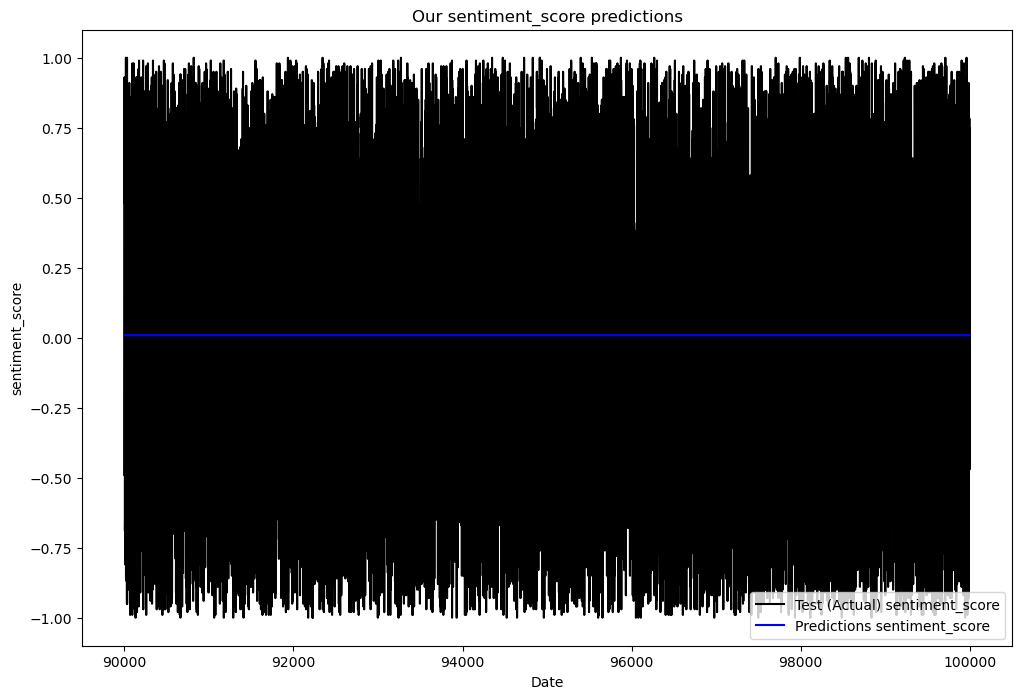

In [24]:
train = data[:training_data_length]
test = data[training_data_length:]

for i in range(len(to_predict)):
    plt.figure(figsize=(12,8))
    # for i in range(len(to_train)):   
    #     plt.plot(train['Date Time'], train[to_train[i]], label=f"Train (Actual) {to_train[i]}", color=colors[i])

    # plt.plot(train[to_predict[i]], label=f"Train (Actual) {to_predict[i]}", color=colors[i+len(to_train)])

    plt.plot(test[to_predict[i]], label=f"Test (Actual) {to_predict[i]}", color=colors[i+len(to_train)+1])

    plt.plot(list(range(training_data_length, training_data_length+len(predictions))), predictions[:, i], label=f"Predictions {to_predict[i]}", color=colors[0])
    plt.title(f'Our {to_predict[i]} predictions')
    plt.xlabel('Date')
    plt.ylabel(f'{to_predict[i]}')
    plt.legend()